In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import scienceplots as scp

import numpy as np
import torch

matplotlib.rcParams['figure.figsize'] = (20, 6)

from main import main, parse_args
from utils.plotting import plot_change_responses, plot_omission_responses, plot_sequence_response
from utils.analysis import process_outputs, get_change_responses, get_omission_responses

import os

SCRATCH = "/storage/scratch1/2/asharafeldin3/data/allen"

ACTION = False

seed = np.random.randint(1001, 9999)
print(f"seed = {seed}")

/storage/coda1/p-hchoi387/0/asharafeldin3/envs/projects/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


seed = 6412


In [2]:
args = parse_args()

if not ACTION:
    args.perception_only = True
    args.lambda_energy = 0.5
    args.lambda_temporal = 1.0
    args.lambda_reward = 0.0
else:
    args.perception_only = False
    args.lambda_reward = 0.1
    args.lambda_temporal = 2.0
    args.lambda_energy = 2.0

args.seed = seed
args.progress_mode = 'epoch'
args.train_path = os.path.join(SCRATCH, "test")
args.test_path = os.path.join(SCRATCH, "train")

args.batch_size = 32

model, data, output = main(args)
Y_train, Y_test, Y_train_om, train_ts, test_ts, train_om_ts, train_oms, test_oms = data.values()
train_responses, train_responses_om, test_responses, test_om_indcs, train_om_indcs = output.values()

100%|██████████| 200/200 [02:59<00:00,  1.11epoch/s, energy=0.128, rewards=nan, spatial=0.227, temporal=3.55, total=3.84, value=nan] 


(-0.5, 1087.5, 31.5, -0.5)

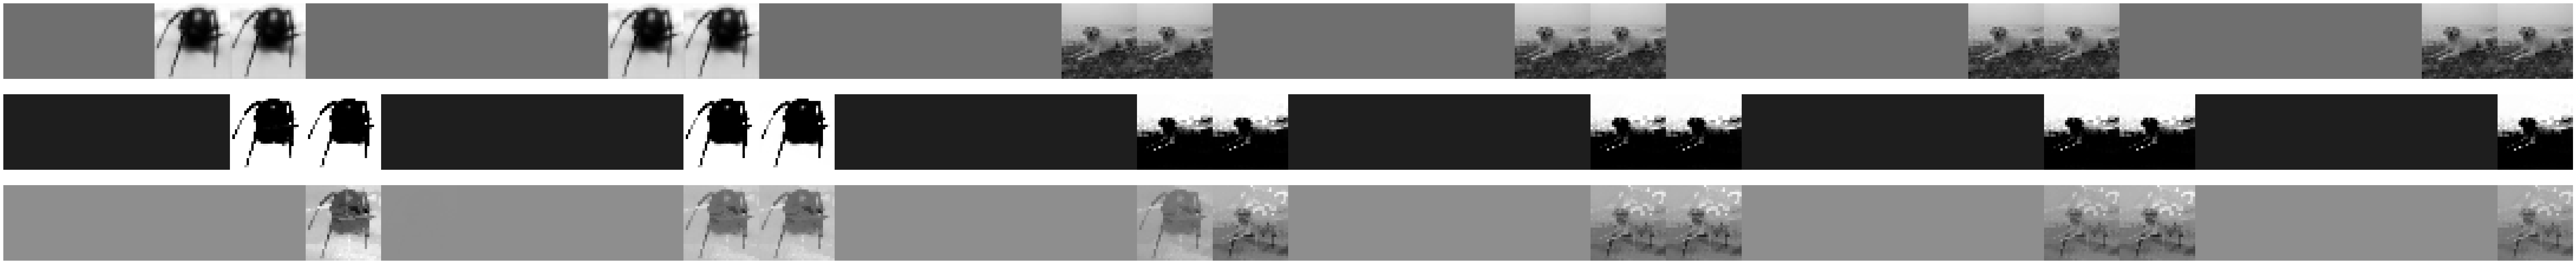

In [15]:
sidx = 75

fam_imgs_fig = plt.figure(figsize=(Y_train.shape[1] * 10, 10))

plt.subplot(3, 1, 1)
plt.imshow(torch.cat(list(Y_train[sidx, 2:37].reshape(-1, args.image_dim, args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")
#plt.title("True")

#plt.figure(figsize=(Y_train.shape[1] * 10, 4))
plt.subplot(3, 1, 2)
plt.imshow(torch.cat(list(train_responses['I_hat'][sidx, 2:37].reshape(-1,  args.image_dim,  args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")
#plt.title("Reconstructed")

train_predictions = model.reconstruction(train_responses['mu_p'][sidx])
plt.subplot(3, 1, 3)
#plt.figure(figsize=(Y_test.shape[1] * 10, 4))
plt.imshow(torch.cat(list(train_predictions[2:37].reshape(-1,  args.image_dim,  args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")
#plt.title("Predicted")

(-0.5, 1087.5, 31.5, -0.5)

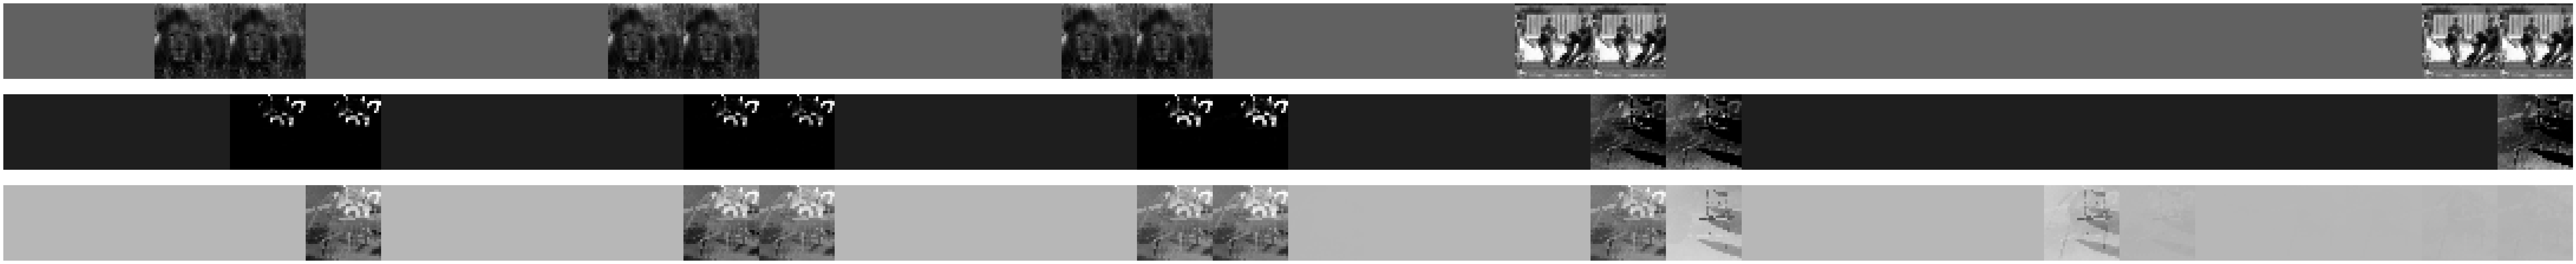

In [4]:
sidx = test_om_indcs[5]

nov_imgs_fig = plt.figure(figsize=(Y_train.shape[1] * 10, 10))

plt.subplot(3, 1, 1)
plt.imshow(torch.cat(list(Y_test[sidx, 2:37].reshape(-1, args.image_dim, args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")
#plt.title("True")

#plt.figure(figsize=(Y_train.shape[1] * 10, 4)) 
plt.subplot(3, 1, 2)
plt.imshow(torch.cat(list(test_responses['I_hat'][sidx, 2:37].reshape(-1, args.image_dim, args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")
#plt.title("Reconstructed")

test_predictions = model.reconstruction(test_responses['mu_p'][sidx])
plt.subplot(3, 1, 3)
#plt.figure(figsize=(Y_test.shape[1] * 10, 4))
plt.imshow(torch.cat(list(test_predictions[2:37].reshape(-1, args.image_dim, args.image_dim)), dim=1).detach().cpu().numpy(), 'gray')
plt.axis("off")

In [5]:
z_train, z_test = train_responses['z'], test_responses['z']
sigmap_train, sigmap_test = train_responses['sigma_p'], test_responses['sigma_p']
sigmaq_train, sigmaq_test = train_responses['sigma_q'], test_responses['sigma_q']
mup_train, mup_test = train_responses['mu_p'], test_responses['mu_p']
theta_train, theta_test = train_responses['theta'], test_responses['theta']
h_train, h_test = train_responses['h'], test_responses['h']
terror_train, terror_test = (train_responses['mu_p'] - train_responses['z'])**2, (test_responses['mu_p'] - test_responses['z'])**2

if not model.perception_only:
    value_train, value_test = train_responses['lick_value'], test_responses['lick_value']
    licks_train, licks_test = train_responses['action'], test_responses['action']

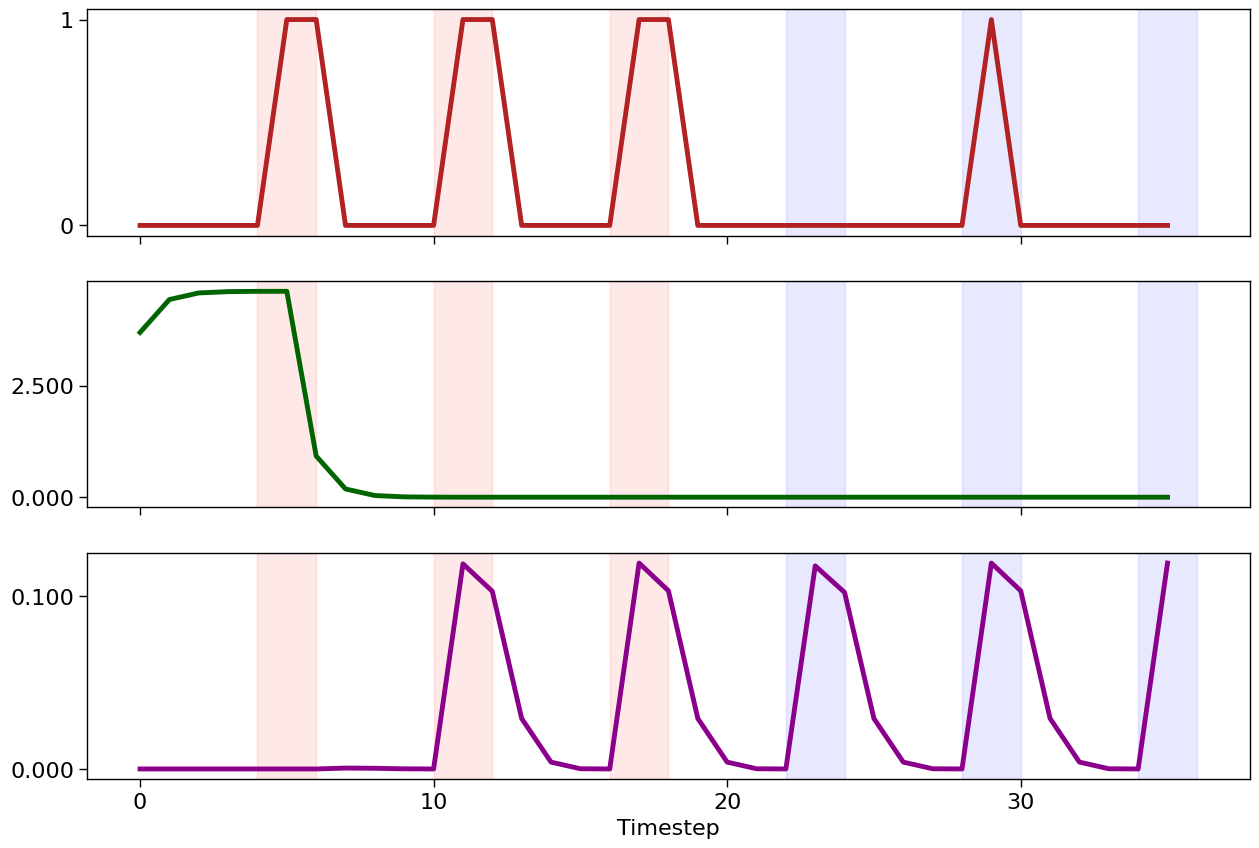

In [6]:
# example sequences (familiar)
plot_sequence_response(train_responses, train_ts, seq_idx=7, perception_only=model.perception_only)

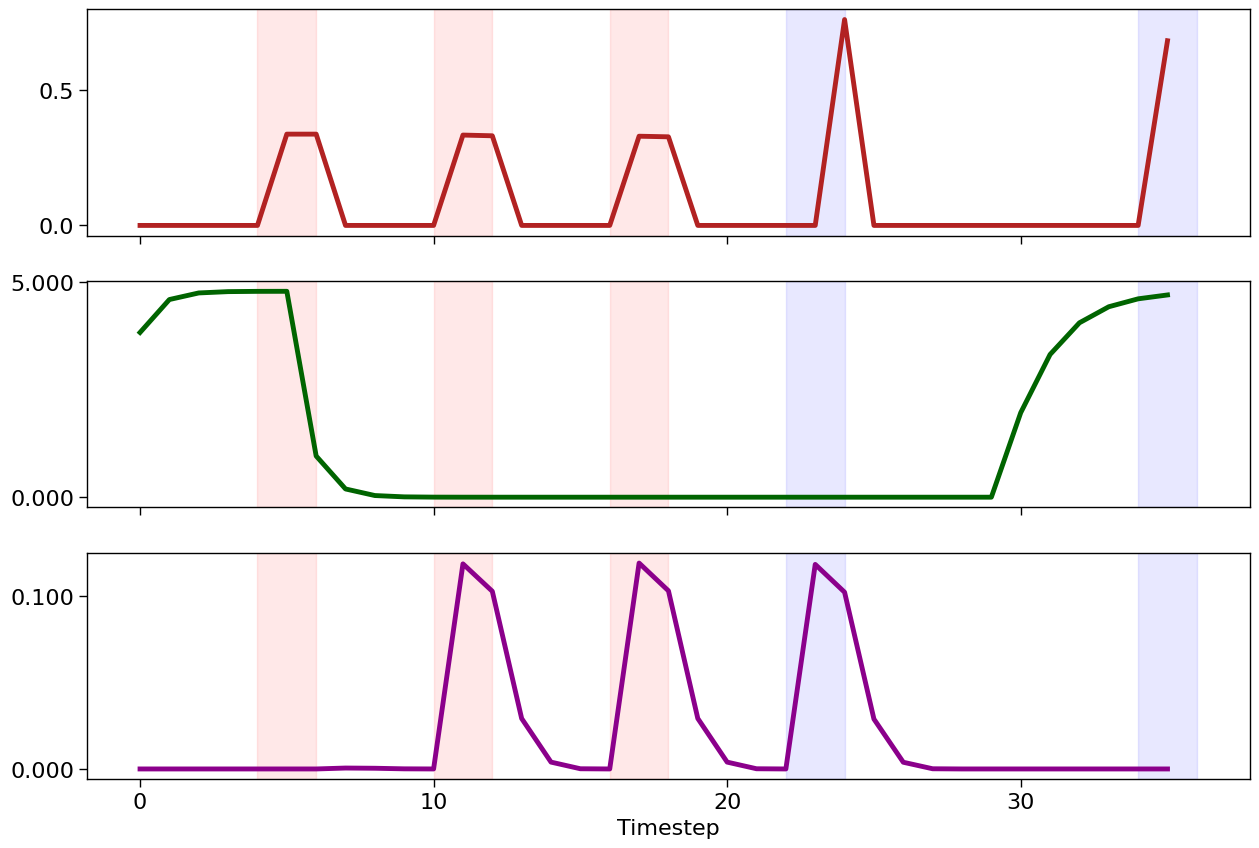

In [7]:
# example sequences (novel)
plot_sequence_response(test_responses, test_ts, seq_idx=test_om_indcs[7], perception_only=model.perception_only)

In [8]:
# get omission and change responses
change_responses, omission_responses = process_outputs(args, model, data, output)

ValueError: num must be an integer with 1 <= num <= 12, not 13

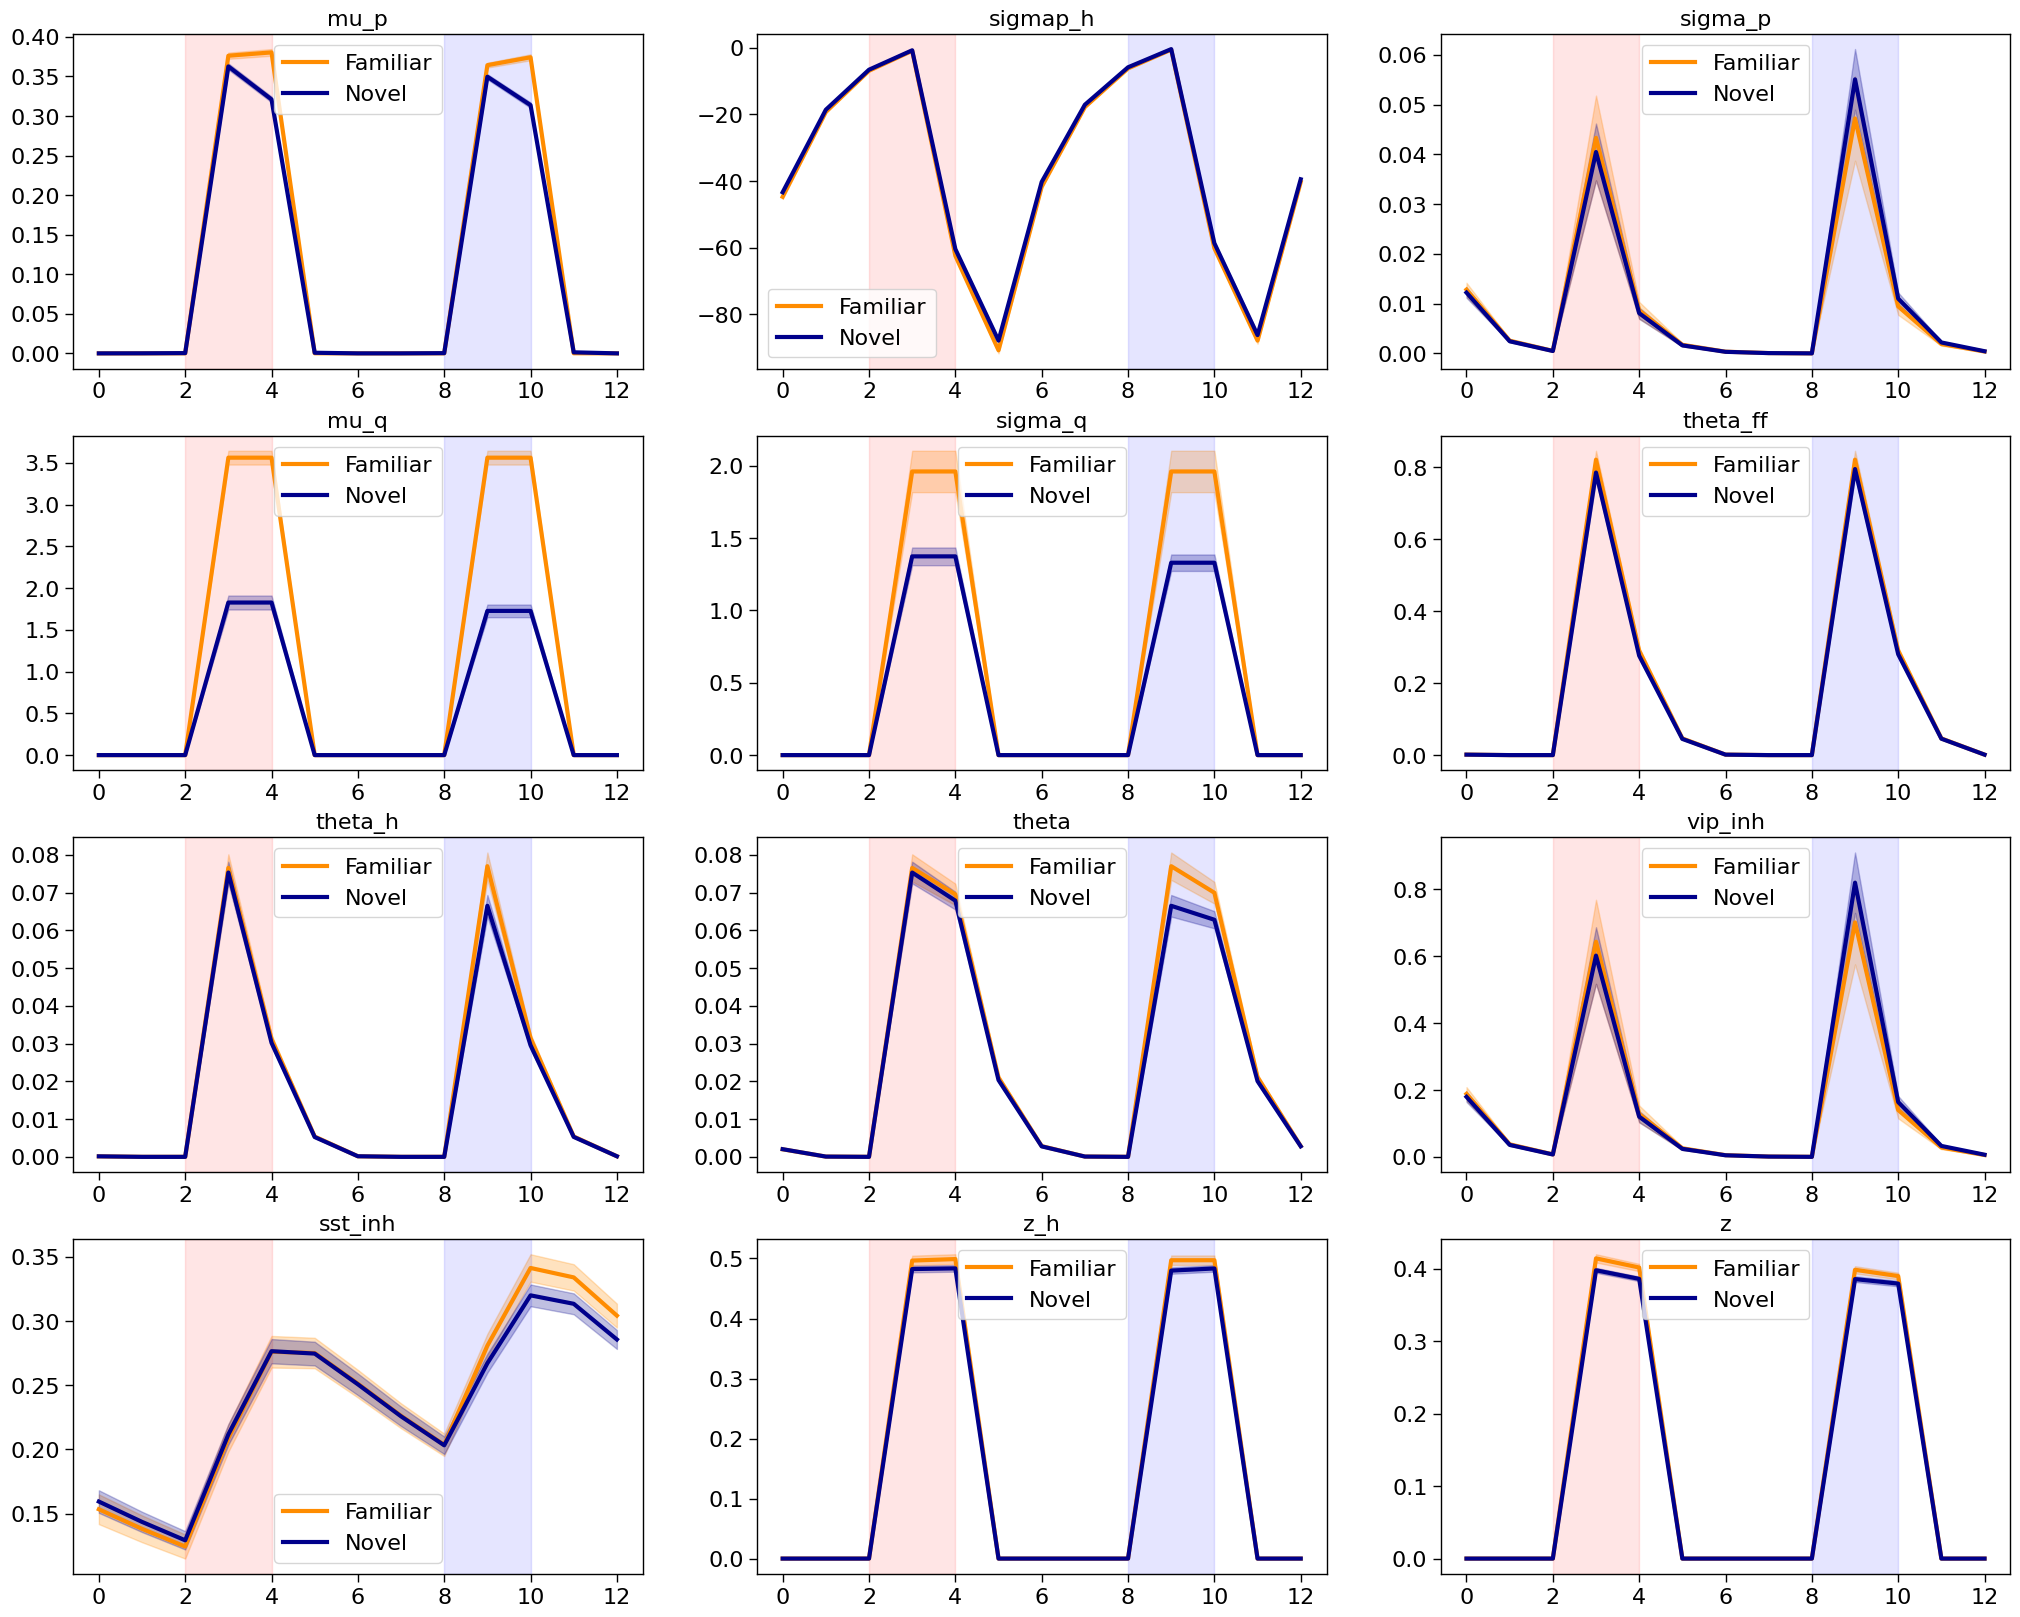

In [9]:
##### plot responses around image change

with plt.style.context(['nature', 'notebook']):

    fig3 = plt.figure(figsize=(25, 20))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(change_responses['familiar'].keys()):
        ax = plt.subplot(4, 3, i+1)
        plot_change_responses(args, ax, change_responses['familiar'][pop], "Familiar", "darkorange")
        plot_change_responses(args, ax, change_responses['novel'][pop], "Novel", "darkblue")
        ax.set_title(f"{pop}")
        ax.legend()

In [ ]:
##### plot responses around omissions

with plt.style.context(['nature', 'notebook']):

    fig3 = plt.figure(figsize=(25, 20))
    plt.tight_layout(pad=10, h_pad=5)

    for i, pop in enumerate(omission_responses['familiar'].keys()):
        ax = plt.subplot(4, 3, i+1)
        plot_omission_responses(args, ax, omission_responses['novel'][pop], "Novel", trace_clr="darkblue", image_clr="magenta", sem=True)
        plot_omission_responses(args, ax, omission_responses['familiar'][pop], "Familiar", trace_clr="darkorange", image_clr="magenta", sem=True)
        _ = ax.set_title(f"{pop}")

In [ ]:
# save
"""
save_dir = "./results/perception_only"
torch.save({
    "args": vars(args),
    "model": model.state_dict(),
    "change_responses": change_responses,
    "omission_responses": omission_responses
}, os.path.join(save_dir, f"perception_only_{seed}"))
"""

In [ ]:
sq_avg = True

test_no_om_indcs = np.where(np.array(test_oms) <= 0)[0]

sq_f, sq_t = 0, 0
start_f = train_ts[sq_f]['before'][0][-1] - args.blank_ts // 2
end_f = train_ts[sq_f]['after'][1][0] + args.blank_ts // 2
start_t = test_ts[test_no_om_indcs[sq_t]]['before'][0][-1] - args.blank_ts // 2
end_t = test_ts[test_no_om_indcs[sq_t]]['after'][1][0] + args.blank_ts // 2

Y_test = Y_test.cuda()

vip_f, vip_t = model.vip_to_theta(train_responses['sigma_p'][sq_f, start_f:end_f]), model.vip_to_theta(test_responses['sigma_p'][sq_t, start_t:end_t])
vipm_f, vipm_t = model.vip_to_theta(train_responses['sigma_p'][sq_f, start_f-1:end_f-1]),  model.vip_to_theta(test_responses['sigma_p'][sq_t, start_t-1:end_t-1])
im_f, im_t = model.I_to_theta(Y_train)[sq_f, start_f-1:end_f-1], model.I_to_theta(Y_test)[sq_t, start_t-1:end_t-1]
thetam_f, thetam_t = train_responses['theta_h'][sq_f, start_f-1:end_f-1], test_responses['theta_h'][sq_t, start_t-1:end_t-1]
actheta_f, actheta_t = train_responses['theta'][sq_f, start_f:end_f], test_responses['theta'][sq_t, start_t:end_t]

if sq_avg:
    for i, fts in enumerate(train_ts):

        if i == sq_f:
            continue

        start_f = fts['before'][0][-1] - args.blank_ts // 2
        end_f = fts['after'][1][0] + args.blank_ts // 2

        vip_f += model.vip_to_theta(train_responses['sigma_p'][i, start_f:end_f])
        vipm_f += model.vip_to_theta(train_responses['sigma_p'][i, start_f-1:end_f-1])
        im_f += model.I_to_theta(Y_train)[i, start_f-1:end_f-1]
        thetam_f += train_responses['theta_h'][i, start_f-1:end_f-1]
        actheta_f += train_responses['theta'][i, start_f:end_f]
    
    for j, no_om_ind in enumerate(test_no_om_indcs):
        
        if j == sq_t:
            continue
        
        tts = test_ts[no_om_ind]
        
        start_t = tts['before'][0][-1] - args.blank_ts // 2
        end_t = tts['after'][1][0] + args.blank_ts // 2

        vip_t += model.vip_to_theta(test_responses['sigma_p'][no_om_ind, start_t:end_t])
        vipm_t += model.vip_to_theta(test_responses['sigma_p'][no_om_ind, start_t-1:end_t-1])
        im_t += model.I_to_theta(Y_test)[no_om_ind, start_t-1:end_t-1]
        thetam_t += test_responses['theta_h'][no_om_ind, start_t-1:end_t-1]
        actheta_t += test_responses['theta'][no_om_ind, start_t:end_t]
        
    vip_f, vipm_f, im_f, thetam_f, actheta_f = vip_f/len(train_ts), vipm_f/len(train_ts), im_f/len(train_ts), thetam_f/len(train_ts), actheta_f/len(train_ts)
    vip_t, vipm_t, im_t, thetam_t, actheta_t = vip_t/len(test_no_om_indcs), vipm_t/len(test_no_om_indcs), im_t/len(test_no_om_indcs), thetam_t/len(test_no_om_indcs), actheta_t/len(test_no_om_indcs)
    
thetah_f = 0.5 * thetam_f + im_f - (vip_f + 0.7 * vipm_f)
thetah_t = 0.5 * thetam_t + im_t - (vip_t + 0.7 * vipm_t)
theta_f = torch.relu(torch.tanh(thetah_f))
theta_t = torch.relu(torch.tanh(thetah_t))

plt.plot(((vip_f + 0.7 * vipm_f)).mean(-1).detach().cpu().numpy(), 'b-', label='vip_f')
plt.plot(((vip_t + 0.7 * vipm_t)).mean(-1).detach().cpu().numpy(), 'b--', label='vip_t')

plt.plot(im_f.mean(-1).detach().cpu().numpy(), 'r-', label='im_f')
plt.plot(im_t.mean(-1).detach().cpu().numpy(), 'r--', label='im_t')

plt.plot((0.01 * thetam_f).mean(-1).detach().cpu().numpy(), 'm-', label='thetam_f')
plt.plot((0.01 * thetam_t).mean(-1).detach().cpu().numpy(), 'm--', label='thetam_t')
plt.legend()

plt.figure()
plt.plot(theta_f.mean(-1).detach().cpu().numpy(), 'g-', label='theta_f')
plt.plot(theta_t.mean(-1).detach().cpu().numpy(), 'g--', label='theta_t')

#plt.plot(actheta_f.mean(-1).detach().cpu().numpy(), 'k-', label='theta_f_actual')
#plt.plot(actheta_t.mean(-1).detach().cpu().numpy(), 'k--', label='theta_t_actual')

plt.legend()

In [ ]:
im_f